<a href="https://colab.research.google.com/github/adityapentyala/FM-Assignment/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bottom-up Approach - Calculation of Beta for Hindustan Petroleum Corporation Ltd.

All the source code used for this assignment, as well as the presentation, can be found at https://github.com/Aarav-H/FM-Assignment/tree/main

### Group no. 33


1.   Aarav Haran - 2022B3A70880H
2.   Vaishnu Kanna - 2022B3A71608H
3.   Aditya Pentyala - 2022B3A70522H
4.   Rishabh Nanda - 2022A3PS0652H





Given below is the source code for Bottom-up approach of calculating Beta for HPCL. The values of Beta and intercepts of the companies have already been calculated using the top-down code provided as part of the assignment. The regression notebooks for each company can be found at https://github.com/Aarav-H/FM-Assignment/tree/main/regression-notebooks.

## Necessary imports

In [234]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression as LR


## Setting financial values

These values are global to this entire notebook. SOurces of information have been mentioned as well.

In [235]:
#Corporate tax rate from https://www.incometax.gov.in/iec/foportal/help/company/return-applicable#taxslabs
tax = 0.25 #assuming the companies come under the "any other domestic company" tax slab

#risk-free rate from https://epwrfits.in/Display_TreeViewSecurity.aspx
rfr = 0.071361

#market risk premium, obtained from http://www.market-risk-premia.com/in.html
market_rp = 0.0143

#HPCL stock price as of 09-04-24, as listed on https://www.nseindia.com/get-quotes/equity?symbol=HINDPETRO
HPCL_stock_price = 458.85

#no of shares (in crores), HPCL, as listed on https://ticker.finology.in/company/HINDPETRO
HPCL_n_shares_cr = 141.85

## Creating a Company class

Allows for the creation of Company objects that contain attributes of each of the companies

In [236]:
#Defining a class which stores all relevant information of each firm
class Company:
    def __init__(self,de_ratio,intercept,name,beta_levered=None):
        self.beta_levered=beta_levered
        self.de_ratio=de_ratio
        self.intercept=intercept
        self.beta_unlevered: float = None
        self.name=name

## Defining functions to calculate costs

In [237]:
#Function to unlever financial leverage from beta
def unlevering(beta_levered,de_ratio,tax):
  return beta_levered/(1+(de_ratio*(1-tax)))

In [238]:
#Function to relever the beta
def relevering(beta_unlevered,de_ratio,tax):
    return beta_unlevered*(1+(de_ratio*(1-tax)))

In [239]:
#Funtion calculating cost of equity
def costofequity(rf,market_rp,beta_relevered):
    return rf+beta_relevered*(market_rp)

In [240]:
#Function to calculate WACC
def WACC_calc(cost_of_debt,tax,Wb,cost_of_equity,Ws):
    return (cost_of_debt*(1-tax)*Wb)+(cost_of_equity*Ws)

## Defining a function to plot Ri vs Rm for the companies

In [241]:
def plot_graph(comparable_companies: list[Company], target_company: Company):
    plt.figure()
    comparable_intercepts = []
    print(target_company.name, ":", target_company.beta_levered)
    for company in comparable_companies:
        print(company.name, ":", company.beta_levered)
        x = np.linspace(0, 10, 101)
        y = company.intercept + company.beta_levered * x
        comparable_intercepts.append(company.intercept)
        plt.plot(x, y, label=company.name, linestyle='dashed')
    target_y = sum(comparable_intercepts)/len(comparable_intercepts) + target_company.beta_levered * x
    plt.plot(x, target_y, label=target_company.name)
    plt.xlabel("Market interest rate")
    plt.ylabel("Firm's interest rate")
    plt.title("Firm interest rate vs market interest rate")
    plt.legend()
    plt.show()

## Calculating market values of debt and equity

Market value of debt obtained from the given source.
Market value of equity calculated using the formula stock price * no. of shares outstanding.

In [242]:
#calculating market values of debt & equity of HPCL
market_value_debt_HPCL_cr = 64517.22 #pulled from https://ticker.finology.in/company/HINDPETRO
market_value_equity_HPCL_cr = HPCL_stock_price * HPCL_n_shares_cr #stock price * no of shares outstanding

## Obtaining D/E ratios for each company and creating company objects

In [243]:
#D-E Ratios, sourced from https://ticker.finology.in
HPCL_de = 2.33
BPCL_de = 1.14
MRPL_de = 1.69
IOCL_de = 1.00
CPCL_de = 0.66

In [244]:
#Defining Company attributes
HPCL=Company(HPCL_de,-0.0005,"HPCL")
BPCL=Company(BPCL_de,-0.0022,"BPCL",1.2529)
MRPL=Company(MRPL_de,0.0082,"MRPL",1.3580)
IOCL=Company(IOCL_de,0.0021,"IOCL",1.0324)
CPCL=Company(CPCL_de,0.0118,"CPCL",1.3004)

## Step-by-step calculation of WACC

Given below are the step-by-step cells used to calculate Beta & WACC of HPCL.

In [245]:
#Step 1: Unlevering the Beta values
BPCL.beta_unlevered=unlevering(BPCL.beta_levered,BPCL.de_ratio,tax)
MRPL.beta_unlevered=unlevering(MRPL.beta_levered,MRPL.de_ratio,tax)
IOCL.beta_unlevered=unlevering(IOCL.beta_levered,IOCL.de_ratio,tax)
CPCL.beta_unlevered=unlevering(CPCL.beta_levered,CPCL.de_ratio,tax)

In [246]:
#Step 2:Calculating the average of the unlevered betas
betas_unlevered=[BPCL.beta_unlevered,MRPL.beta_unlevered,IOCL.beta_unlevered,CPCL.beta_unlevered]
mean_beta_unlevered=sum(betas_unlevered)/len(betas_unlevered)

In [247]:
#Step 3:Relevering the mean unlevered beta with respect to HPCL
HPCL_relevered=relevering(mean_beta_unlevered,HPCL.de_ratio,tax)
HPCL.beta_levered=HPCL_relevered
print("Beta levered of HPCL is: ", HPCL.beta_levered)

Beta levered of HPCL is:  1.8779786779995993


In [248]:
#Step 4:Calcutaing cost of equity and debt
cost_of_equity=costofequity(rfr, market_rp, HPCL.beta_levered)
cost_of_debt=0.14  #The interest coverage ratio of the firm was -4.52 which equated to a 14% interest rate on debt

In [249]:
#Step 5:Calculating the weightage of debt and equity
Ws=1/(1+HPCL.de_ratio)
Wb=1-Ws

In [250]:
#Step 6:Calculating the WACC for the firm
WACC=WACC_calc(cost_of_debt,tax,Wb,cost_of_equity,Ws)
print("The value of WACC for HPCL is ", WACC)

print("HPCL's market value of equity is: ", market_value_equity_HPCL_cr, "(in crores) as on 09-04-24")
print("HPCL's market value of debt is: ", market_value_debt_HPCL_cr, "(in crores)")

The value of WACC for HPCL is  0.10296279131993823
HPCL's market value of equity is:  65087.8725 (in crores) as on 09-04-24
HPCL's market value of debt is:  64517.22 (in crores)


HPCL : 1.8779786779995993
BPCL : 1.2529
MRPL : 1.358
IOCL : 1.0324
CPCL : 1.3004


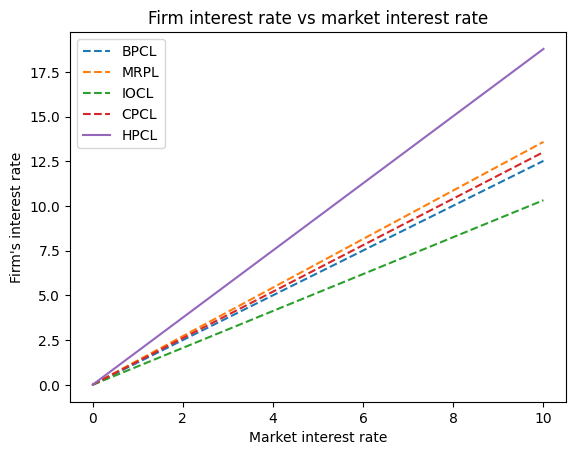

In [251]:
plot_graph([BPCL, MRPL, IOCL, CPCL], HPCL)

In [252]:
def plot_beta_histogram(companies: list[Company]):
  plt.figure()
  betas = [company.beta_levered for company in companies]
  names = [company.name for company in companies]
  colors = ['tab:red']
  colors.extend((['tab:blue']*4))
  print(betas, names, colors)
  plt.bar(names, betas, color=colors)
  plt.xlabel("Company")
  plt.ylabel("Beta")
  plt.title("Beta across companies")
  plt.show()

[1.8779786779995993, 1.2529, 1.3004, 1.0324, 1.358] ['HPCL', 'BPCL', 'CPCL', 'IOCL', 'MRPL'] ['tab:red', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue']


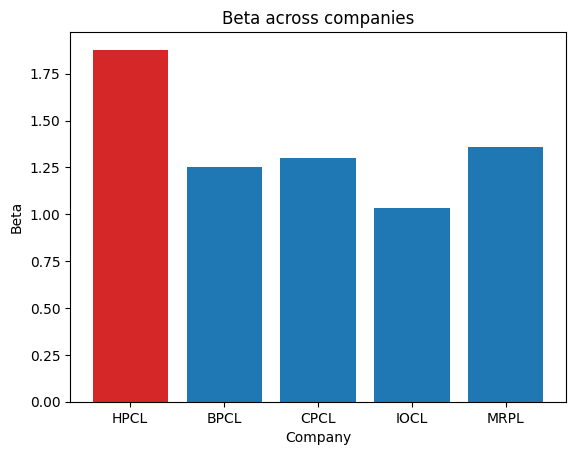

In [253]:
plot_beta_histogram([HPCL, BPCL, CPCL, IOCL, MRPL])

In [254]:
def plot_de_ratios(companies: list[Company]):
  plt.figure()
  ratios = [company.de_ratio for company in companies]
  names = [company.name for company in companies]
  colors = ['tab:red']
  colors.extend((['tab:blue']*4))
  print(ratios, names, colors)
  plt.bar(names, ratios, color=colors)
  plt.xlabel("Company")
  plt.ylabel("D/E ratio")
  plt.title("D/E ratio across companies")
  plt.show()

[2.33, 1.14, 0.66, 1.0, 1.69] ['HPCL', 'BPCL', 'CPCL', 'IOCL', 'MRPL'] ['tab:red', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue']


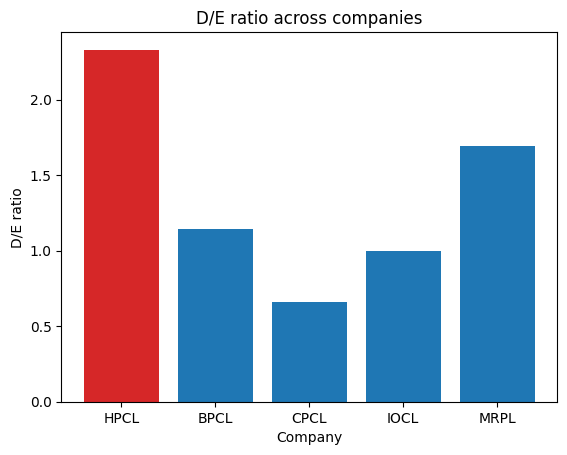

In [255]:
plot_de_ratios([HPCL, BPCL, CPCL, IOCL, MRPL])

In [256]:
def beta_vs_de(companies: list[Company]):
  plt.figure()
  betas = [company.beta_levered for company in companies]
  ratios = [company.de_ratio for company in companies]
  lr_model = LR().fit(np.array(ratios).reshape(-1,1), betas)
  x = np.linspace(1, 2.5, num=16)
  y = lr_model.predict(np.array(x).reshape(-1,1))
  names = [company.name for company in companies]
  for company in companies:
    plt.scatter(company.de_ratio, company.beta_levered, label=company.name)
  plt.plot(x, y, label="fitted model")
  plt.xlabel("D/E ratio")
  plt.ylabel("Beta (levered)")
  plt.legend()
  plt.title("Beta (levered) vs D/E ratio")
  plt.show()

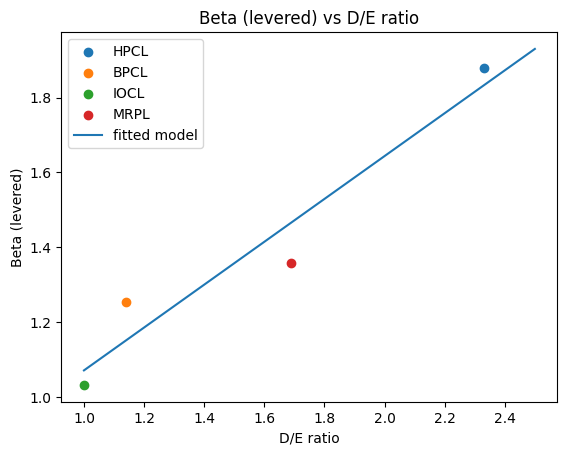

In [257]:
beta_vs_de([HPCL, BPCL, IOCL, MRPL])

From the above Beta vs D/E graph, we can conclude that there seems to exist some positive correlation between a higher D/E ratio and Beta for the firm.

## Interpretation of Beta value and graphs

From the graphs, it is clear that HPCL's interest rate is higher than the market interest rate. This can be attributed to the fact that HPCL's D/E ratio (2.33) is far higher than those of the other 4 companies in the same industry (averaged at 1.1225), leading upto a higher rate of risk. A higher beta caused by high debt indicates greater volatility in stock movement for the firm than the market.

## Final Deliverables for HPCL

WACC = 10.296%

Market Value of Equity (as on 09-04-24) = 65087.8725 (in crores)

Beta = 1.8780 (using bottom-up approach)